In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [2]:
canv = ROOT.TCanvas("canv","canv",900,450)
rfile = ROOT.TFile("calib.root","READ")
ds = rfile["tree"]

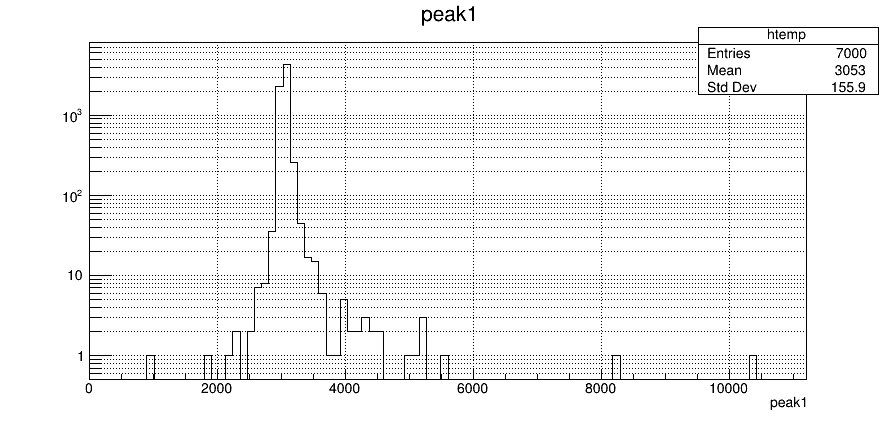

In [3]:
ROOT.gPad.SetLogy()
ROOT.gPad.SetGridx()
ROOT.gPad.SetGridy()
ds.Draw("peak1")
canv.Draw()

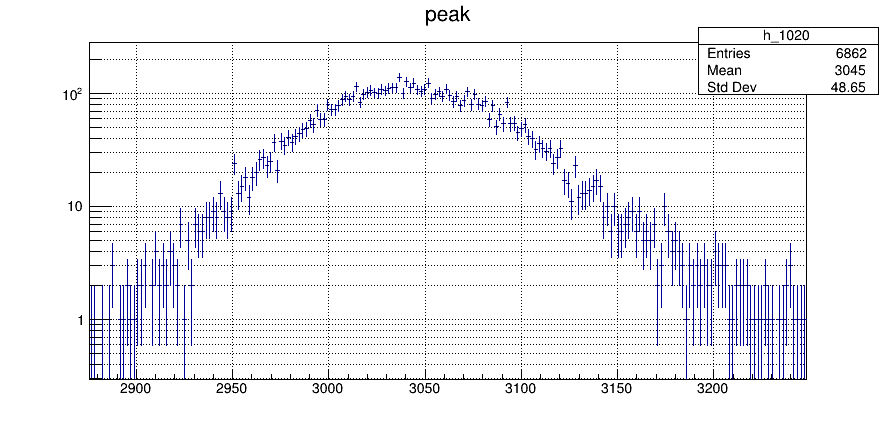

In [5]:
zrec   = ROOT.RooRealVar("zrec","reconstructed z",11.5,13)
peak   = ROOT.RooRealVar("peak","reconstructed z",2000,5000)
varset = ROOT.RooArgSet( zrec, peak )
zds    = ROOT.RooDataSet("zds","dataser with zrec", varset)
for ev in ds:
    if 0.004*ev.peak1>11.5 and 0.004*ev.peak1<13:
        zrec.setVal( 0.004*ev.peak1 )
        peak.setVal( ev.peak1       )
        zds.add (varset)
zds.draw("peak")
canv.Draw()


  RooFitResult: minimized FCN value: -1520.02, estimated distance to minimum: 2.81647e-06
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
            asym_apolo   -3.0000e-01   -1.2324e-01 +/-  1.69e-02  0.897008
            beta_apolo    1.0000e+00    5.9067e+00 +/-  1.06e+00  0.066804
            mean_apolo    1.2300e+01    1.2142e+01 +/-  5.54e-03  0.896859
           sigma_apolo    1.0000e+00    2.0000e-01 +/-  1.49e-04  0.000379




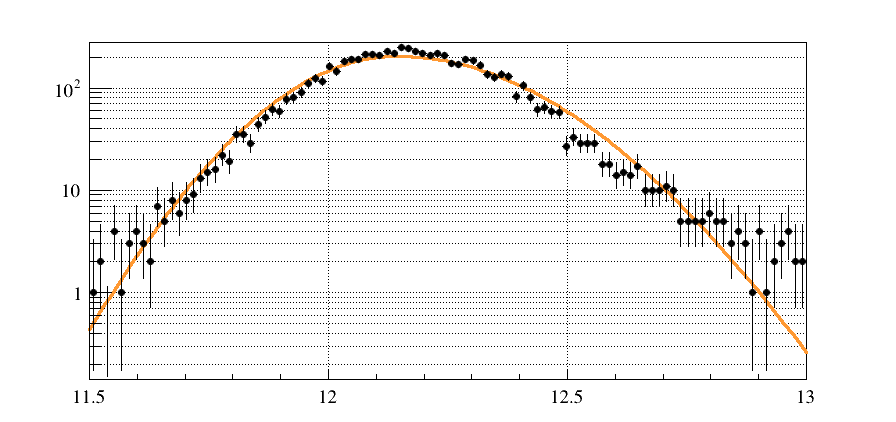

In [6]:
apolo  = Models.Apollonios2_pdf("apolo", xvar=zrec, mean=(12.3,11.5,13.0),sigma=(1.,0.2,3),asymmetry=(-0.3,-0.4,0.4),beta=(1,0.5,50))
r,w = apolo.fitTo(zds, draw=True, silent=True)
w.Draw()
print(r)
canv.Draw()


  RooFitResult: minimized FCN value: -1533.38, estimated distance to minimum: 1.42529e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
            mean_bukin    1.2300e+01    1.2184e+01 +/-  6.80e-03  0.933443
            rhoL_bukin    1.0000e-01    1.2219e+00 +/-  8.42e-02  0.860668
            rhoR_bukin    1.0000e-01    3.0827e-01 +/-  1.09e-01  0.905668
           sigma_bukin    2.0000e+00    2.0000e-01 +/-  1.48e-04  0.000666
              xi_bukin    4.0000e-01   -8.0656e-02 +/-  2.87e-02  0.976082




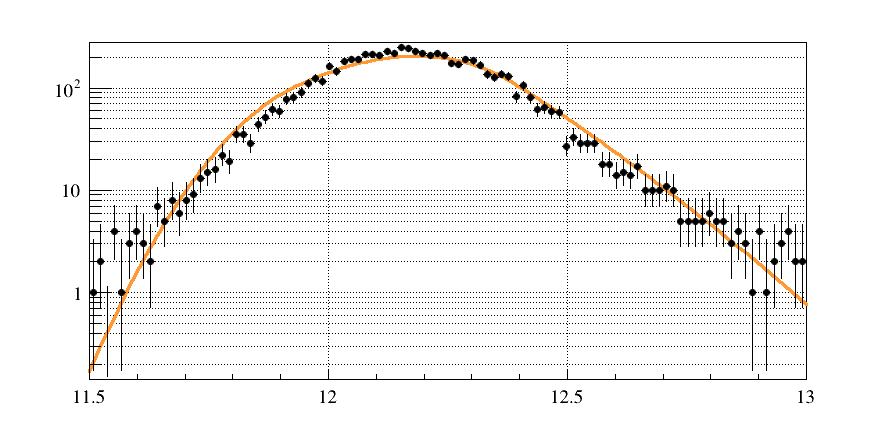

In [7]:
bukin  = Models.Bukin_pdf("bukin", xvar=zrec, mean=(12.3,11.5,13.0), sigma=(2.,0.2,3),
                          xi=(1.6,-0.4,0.4),rhoL=(0.1,0.01,2),rhoR=(0.1,0.01,2))
r,w = bukin.fitTo(zds, draw=True, silent=True)
w.Draw()
print(r)
canv.Draw()

In [8]:
zds.statVar("peak")

WStat: #=6863           sum=20895865        mean=      3045 +- 48.716     min/max=      2876/3248      

In [9]:
print(zds)

+RooDataSet("zds","dataser with zrec"):6863 entries, 2 variables+---------+
|   Variable    |   Description   |  mean   |   rms   |   min   |   max   |
+---------------+-----------------+---------+---------+---------+---------+
| 1. peak       | reconstructed z | +3044.7 | 48.716  | +2875.7 | +3248.1 |
| 2. zrec       | reconstructed z | +12.179 | 0.19931 | +11.503 | +12.992 |
+---------------+-----------------+---------+---------+---------+---------+


In [10]:
zds.median("peak")

Quantile(3042.6,n=6863)

In [9]:
zds.mean("peak")

( 3044.71 +- 0.587994 )

In [11]:
0.5*(3044.71 +3042.6)

3043.6549999999997

In [12]:
rfile2 = ROOT.TFile("calib310.root","READ")
ds2 = rfile2["tree"]

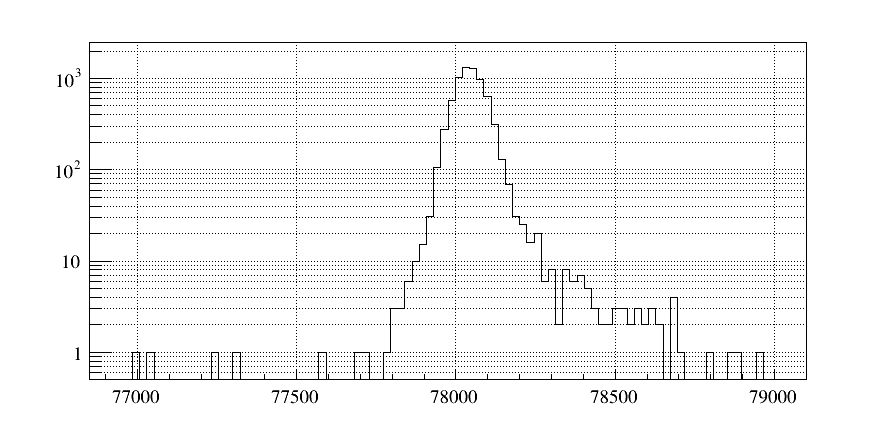

In [13]:
ds2.Draw("peak1","peak1>77000 && peak1<79000")
canv.Draw()

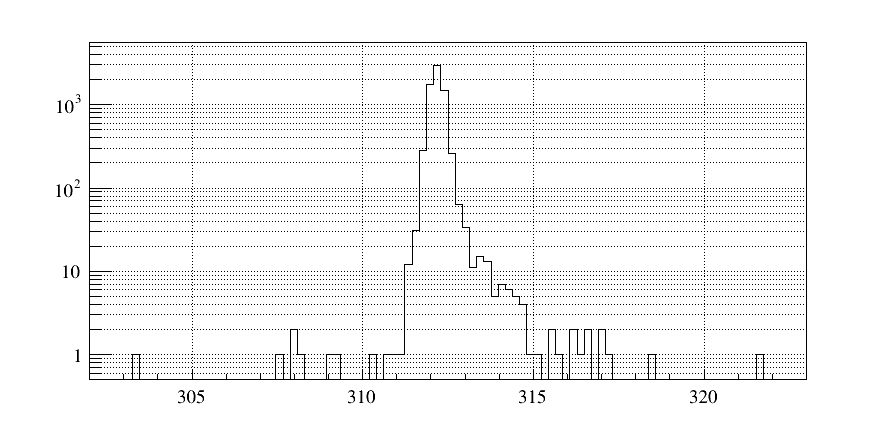

In [14]:
ds2.Draw("peak1*0.004","peak1*0.004>300 && peak1*0.004<330")
canv.Draw()

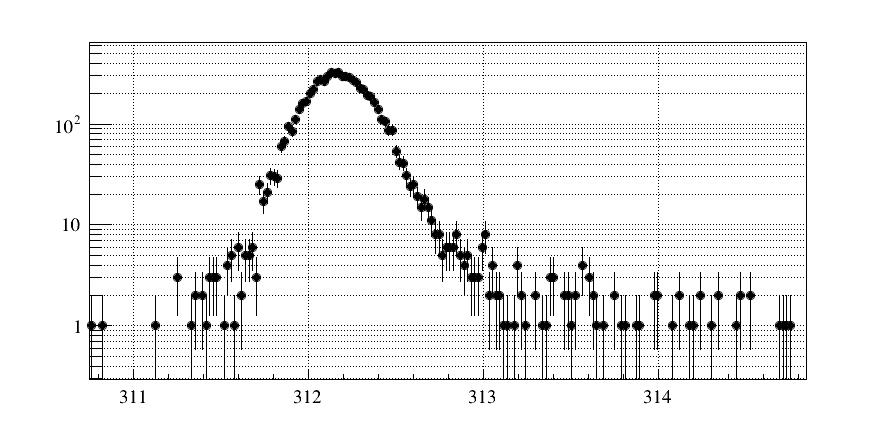

In [15]:
zrec2  = ROOT.RooRealVar("zrec2","reconstructed z",310.5,315)
peak2  = ROOT.RooRealVar("peak2","reconstructed z",77500,79000)
varset2 = ROOT.RooArgSet( zrec2, peak2 )
zds2    = ROOT.RooDataSet("zds2","dataser with zrec2", varset2)
for ev in ds2:
    if 0.004*ev.peak1>310.5 and 0.004*ev.peak1<315.:
        zrec2.setVal( 0.004*ev.peak1 )
        peak2.setVal( ev.peak1       )
        zds2.add (varset2)
zds2.draw("zrec2")
canv.Draw()

In [16]:
zds2.median("peak2")

Quantile(78044,n=6959)

In [17]:
zds2.mean("peak2")

( 78049.4 +- 0.784861 )

In [18]:
0.5*(78049.4+78044)

78046.7

In [30]:
(78046.7-3043.7)/300.

250.01

In [31]:
1./((78046.7-3043.7)/300.)

0.003999840006399744

In [32]:
10./3043.7

0.003285474915399021